# Group 29 - Iron Giant: PYstachio

Displaying a random Image from the Dataset: kirmizi 30.jpg


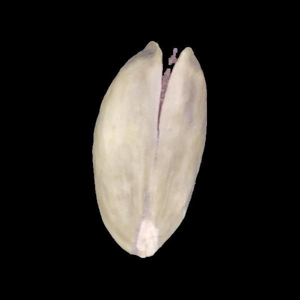

In [58]:
from IPython.display import display
import PIL.Image
import random
import os

image_folder = [ "Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/" , "Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio/" ]
pystachio_type = random.choice([0,1])
picture_files = os.listdir(image_folder[pystachio_type])

random_img = random.choice(picture_files)
display_img = PIL.Image.open(Path(f"{image_folder[pystachio_type]}{random_img}"))

print("Displaying a random Image from the Dataset: " + random_img)
display(display_img.resize(( int(display_img.width * 0.5), int(display_img.height * 0.5))))

In [59]:
# imports
from scipy.io import arff
from pathlib import Path
import pandas as pd
import numpy as np

# fetching preprocessed images dataset

data_folder = Path("Pistachio_Image_Dataset/Pistachio_28_Features_Dataset")

dataset_file = data_folder / "Pistachio_28_Features_Dataset.arff"

data, metadata = arff.loadarff(dataset_file)
df = pd.DataFrame(data)

df

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391.0,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160.0,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,b'Kirmizi_Pistachio'
1,68358.0,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991.0,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,b'Kirmizi_Pistachio'
2,73589.0,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234.0,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,b'Kirmizi_Pistachio'
3,71106.0,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153.0,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,b'Kirmizi_Pistachio'
4,80087.0,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929.0,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,b'Kirmizi_Pistachio'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983.0,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536.0,0.6799,1.7855,...,20.8474,20.8118,21.1175,-0.6994,-0.7071,-0.6963,2.8853,2.6599,2.6317,b'Siirt_Pistachio'
2144,85691.0,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439.0,0.6590,1.5770,...,21.2621,22.5004,21.5821,-0.5567,-0.4968,-0.6597,2.3022,2.2664,2.5161,b'Siirt_Pistachio'
2145,101136.0,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286.0,0.7584,1.7514,...,21.1262,20.0279,17.4401,-0.9072,-0.8790,-0.4470,3.3112,3.4306,3.0697,b'Siirt_Pistachio'
2146,97409.0,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376.0,0.7635,1.6468,...,19.3274,19.1782,19.8930,-0.9473,-0.8404,-0.3153,3.4237,2.9606,3.0033,b'Siirt_Pistachio'


In [60]:
# Preprocessing

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Extract all features
X = df.loc[:, df.columns != 'Class'].to_numpy()

# Hot encode targets
enc = OneHotEncoder(categories=[[b'Kirmizi_Pistachio', b'Siirt_Pistachio']])
y = df['Class'].to_numpy().reshape(-1,1)
enc.fit(y)
y = enc.transform(y).toarray()


# Split data to test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 29)
print(len(X_train),len(X_test))

# Scaling training data
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)



1611 537


In [61]:
# Creating the model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

# Model parameters
# See: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.fit
model = MLPClassifier(
                    hidden_layer_sizes=(25,),
                    activation = 'logistic', 
                    solver = 'adam', 
                    alpha = 0.0001,
                    beta_1 = 0.9,
                    beta_2 = 0.999,
                    epsilon = 1e-8,
                    learning_rate_init = 0.1, 
                    max_iter = 400,
                    n_iter_no_change = 10,
                    tol = 1e-4, 
                    random_state = 29
                    )


# cross-validation
scoring = ['accuracy', 'recall_micro', 'precision_micro', 'f1_micro']
scores = cross_validate(model, X_scaled_train, y_train, cv=5, scoring = scoring)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("%0.2f recall" % scores['test_recall_micro'].mean())
print("%0.2f precision" % scores['test_precision_micro'].mean())
print("%0.2f f1" % scores['test_f1_micro'].mean())

0.91 accuracy with a standard deviation of 0.02
0.91 recall
0.91 precision
0.91 f1


In [62]:
# Test model (used once we are happy with cross_validated scores)

from sklearn.metrics import f1_score, recall_score, precision_score

model.fit(X_scaled_train, y_train)

predicted = model.predict(X_scaled_test)
f1 = f1_score(y_test, predicted, average = 'micro')
recall = recall_score(y_test, predicted, average = 'micro')
precision = precision_score(y_test, predicted, average = 'micro')
print("Precision: {}\nRecall: {}\nF1: {}".format(precision, recall, f1))

Precision: 0.9236499068901304
Recall: 0.9236499068901304
F1: 0.9236499068901304


In [63]:
from sklearn.metrics import classification_report
#Predicting y for X_val

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       310
           1       0.93      0.88      0.91       227

   micro avg       0.92      0.92      0.92       537
   macro avg       0.93      0.92      0.92       537
weighted avg       0.92      0.92      0.92       537
 samples avg       0.92      0.92      0.92       537



Text(0.5, 15.0, 'Predicted label')

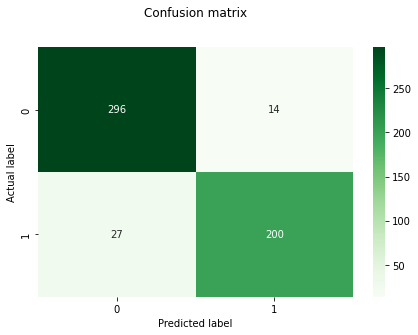

In [64]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


cnf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), predicted.argmax(axis=1))
class_names=['Kirmizi','Siirt'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')